In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import matplotlib as mp
import streamlit as st
import seaborn as sns
from scipy.stats import zscore
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets

In [8]:
SB = pd.read_csv(r"C:\Users\Sima\Desktop\AIM-ML\Week-0\data\sierraleone-bumbuna.csv")
benin_data.head(10)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
5,2021-10-30 00:06,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.7,NaN
6,2021-10-30 00:07,-0.7,0.0,-0.8,0.0,0.0,22.0,99.4,0.1,0.7,0.2,240.4,0.0,1002,0,0.0,22.3,22.7,NaN
7,2021-10-30 00:08,-0.7,0.0,-0.8,0.0,0.0,22.0,99.5,0.2,0.7,0.4,233.5,1.6,1002,0,0.0,22.4,22.7,NaN
8,2021-10-30 00:09,-0.7,-0.1,-0.8,0.0,0.0,22.0,99.5,0.7,1.1,0.5,232.0,0.3,1002,0,0.0,22.4,22.7,NaN
9,2021-10-30 00:10,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.6,1.1,0.5,232.5,0.3,1002,0,0.0,22.4,22.7,NaN


In [9]:
SB.shape

(525600, 19)

In [10]:
data_types = SB.dtypes
data_types

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

In [11]:
missing_values = SB.isnull().sum()
missing_values

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [12]:
SB.duplicated().sum()

0

In [13]:
SB.duplicated().sum()

0

In [14]:
SB.drop('Comments', axis=1)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-29 23:56,-1.6,-0.1,-2.9,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5
525596,2022-10-29 23:57,-1.7,-0.1,-3.0,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5
525597,2022-10-29 23:58,-1.7,-0.1,-3.1,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4
525598,2022-10-29 23:59,-1.7,-0.2,-3.3,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4


In [15]:
summary_stats = SB.describe()
print("Summary Statistics: \n", summary_stats)

Summary Statistics: 
                  GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%        

In [20]:
average_ghi = SB['GHI'].mean()
average_tamb = SB['Tamb'].mean()
average_DNI = SB['DNI'].mean()
print(f"Average GHI: {average_ghi}")
print(f"Average Ambient Temperature: {average_tamb}")
print(f"Average DNI: {average_DNI}")

Average GHI: 201.95751522070017
Average Ambient Temperature: 26.319394216133944
Average DNI: 116.37633694824962


# **Descriptive Analysis**

## Convert Timestamp to datetime

In [23]:

SB['Timestamp'] = pd.to_datetime(SB['Timestamp'])

C:\Users\Sima\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


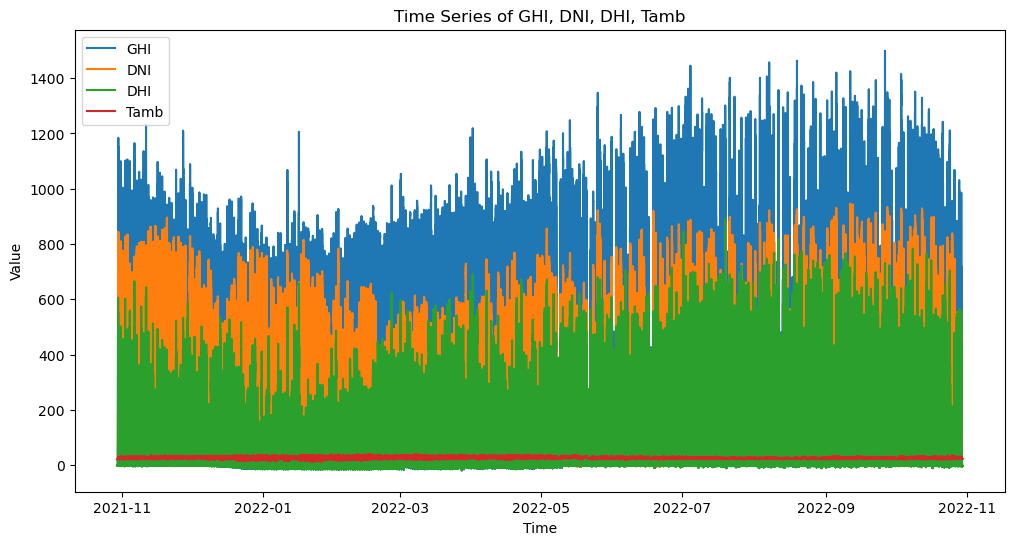

In [24]:
# Plot time series for GHI, DNI, DHI, Tamb
mp.pyplot.figure(figsize=(12, 6))
mp.pyplot.plot(SB['Timestamp'], SB['GHI'], label='GHI')
mp.pyplot.plot(SB['Timestamp'], SB['DNI'], label='DNI')
mp.pyplot.plot(SB['Timestamp'], SB['DHI'], label='DHI')
mp.pyplot.plot(SB['Timestamp'], SB['Tamb'], label='Tamb')
mp.pyplot.xlabel('Time')
mp.pyplot.ylabel('Value')
mp.pyplot.title('Time Series of GHI, DNI, DHI, Tamb')
mp.pyplot.legend()
mp.pyplot.show()

## Correlation heatmap

C:\Users\Sima\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


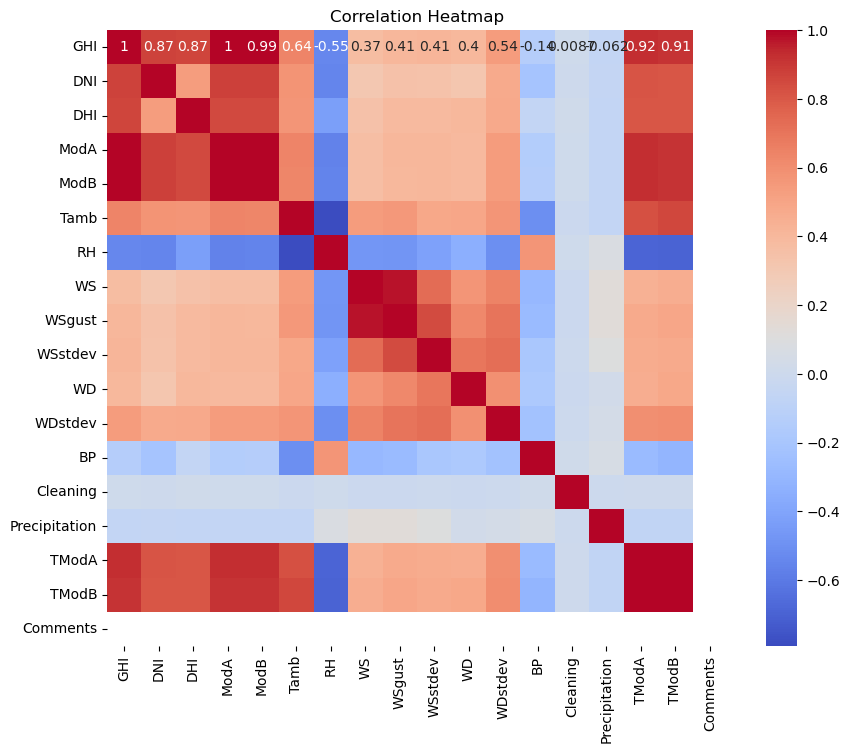

In [25]:

mp.pyplot.figure(figsize=(10, 8))
corr = SB.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
mp.pyplot.title('Correlation Heatmap')
mp.pyplot.show()

## Polar plot for wind speed and direction

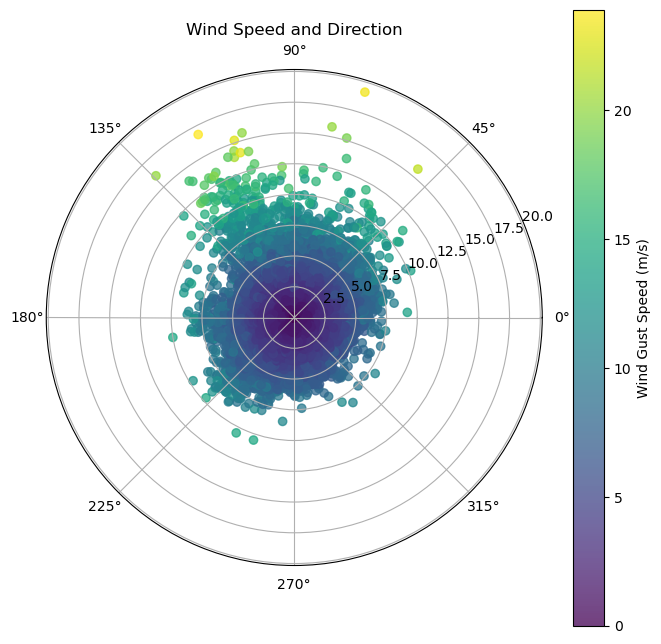

In [26]:


mp.pyplot.figure(figsize=(8, 8))
mp.pyplot.subplot(projection='polar')
# mp.pyplot.scatter(SB['WD'] * np.pi / 180, SB['WS'], c=SB['WSgust'], cmap=mp.viridis, alpha=0.75)
mp.pyplot.scatter(SB['WD'] * np.pi / 180, SB['WS'], c=SB['WSgust'], alpha=0.75)
mp.pyplot.colorbar(label='Wind Gust Speed (m/s)')
mp.pyplot.title('Wind Speed and Direction')
mp.pyplot.show()

## Create histograms for GHI, DNI, DHI, WS, and temperatures

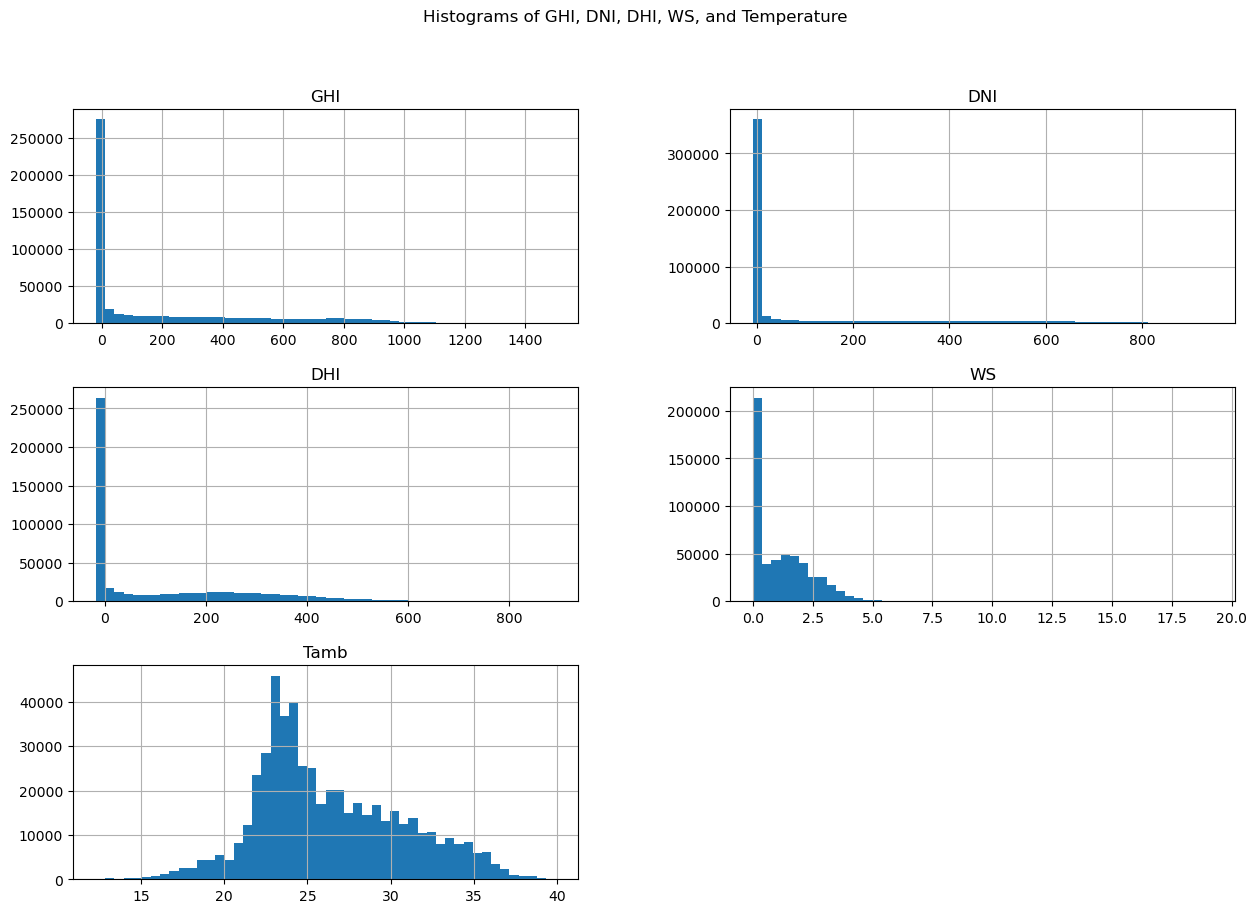

In [27]:

SB[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']].hist(figsize=(15, 10), bins=50)
mp.pyplot.suptitle('Histograms of GHI, DNI, DHI, WS, and Temperature')
mp.pyplot.show()

## Bubble chart for GHI vs. Tamb vs. WS, with RH as bubble size

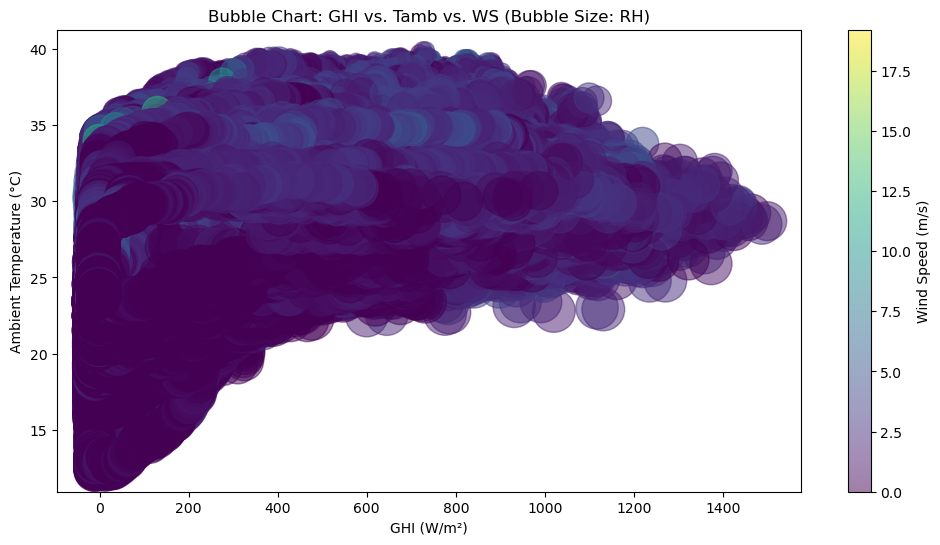

In [28]:

mp.pyplot.figure(figsize=(12, 6))
mp.pyplot.scatter(SB['GHI'], SB['Tamb'], s=SB['RH']*10, alpha=0.5, c=SB['WS'], cmap='viridis')
mp.pyplot.colorbar(label='Wind Speed (m/s)')
mp.pyplot.xlabel('GHI (W/m²)')
mp.pyplot.ylabel('Ambient Temperature (°C)')
mp.pyplot.title('Bubble Chart: GHI vs. Tamb vs. WS (Bubble Size: RH)')
mp.pyplot.show()

## Drop rows with missing data
### print("Cleaned Data:\n", benin_data_cleaned.head())

In [29]:

SB_cleaned = SB.dropna(axis=1, how='all')  


## Drop columns with all missing values

In [30]:

SB_cleaned = SB.dropna(axis=1, how='all')
print("Cleaned Data (Columns):\n", SB_cleaned.head(10))

Cleaned Data (Columns):
             Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0 2021-10-30 00:01:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1 2021-10-30 00:02:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2 2021-10-30 00:03:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3 2021-10-30 00:04:00 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4 2021-10-30 00:05:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
5 2021-10-30 00:06:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
6 2021-10-30 00:07:00 -0.7  0.0 -0.8   0.0   0.0  22.0  99.4  0.1     0.7   
7 2021-10-30 00:08:00 -0.7  0.0 -0.8   0.0   0.0  22.0  99.5  0.2     0.7   
8 2021-10-30 00:09:00 -0.7 -0.1 -0.8   0.0   0.0  22.0  99.5  0.7     1.1   
9 2021-10-30 00:10:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.6     1.1   

   WSstdev     WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  
0      0.0    0.0      0.0  1002         0           

## Perform a t-test on GHI values

In [32]:

from scipy import stats
t_stat, p_value = stats.ttest_ind(SB['GHI'], SB['DHI'])
print(f"T-statistic: {t_stat}, p-value: {p_value}")

T-statistic: 189.1624795239887, p-value: 0.0


## Calculate the correlation matrix

In [34]:

correlation_matrix = SB.corr()
print(correlation_matrix)

               Timestamp       GHI       DNI       DHI      ModA      ModB  \
Timestamp       1.000000 -0.035870 -0.158863  0.075887 -0.072786 -0.067364   
GHI            -0.035870  1.000000  0.869108  0.865815  0.995052  0.994614   
DNI            -0.158863  0.869108  1.000000  0.536710  0.876465  0.874956   
DHI             0.075887  0.865815  0.536710  1.000000  0.850255  0.850799   
ModA           -0.072786  0.995052  0.876465  0.850255  1.000000  0.999127   
ModB           -0.067364  0.994614  0.874956  0.850799  0.999127  1.000000   
Tamb           -0.098897  0.641261  0.578346  0.568655  0.637249  0.633820   
RH              0.368547 -0.546677 -0.548800 -0.431910 -0.564704 -0.557814   
WS             -0.028135  0.371309  0.311493  0.347216  0.366454  0.364795   
WSgust         -0.015236  0.411449  0.342094  0.385978  0.406698  0.404979   
WSstdev        -0.013082  0.412536  0.338732  0.390400  0.409789  0.408429   
WD              0.028350  0.404333  0.315941  0.403761  0.394293

## Assuming 1440 minutes in a day

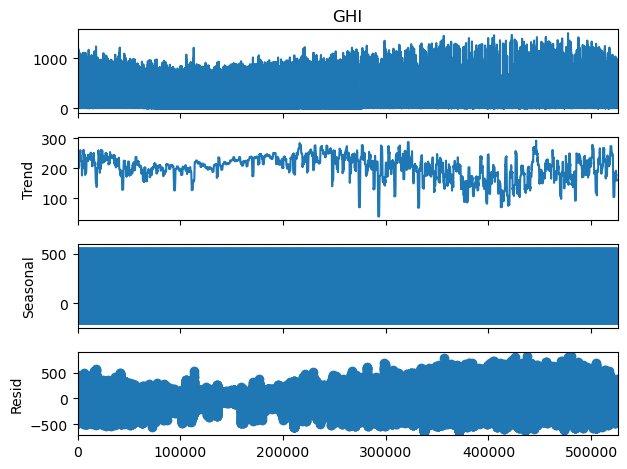

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(SB['GHI'], model='additive', period=1440)  
result.plot()
plt.show()

## Plotting Global Horizontal Irradiance (GHI) over time.

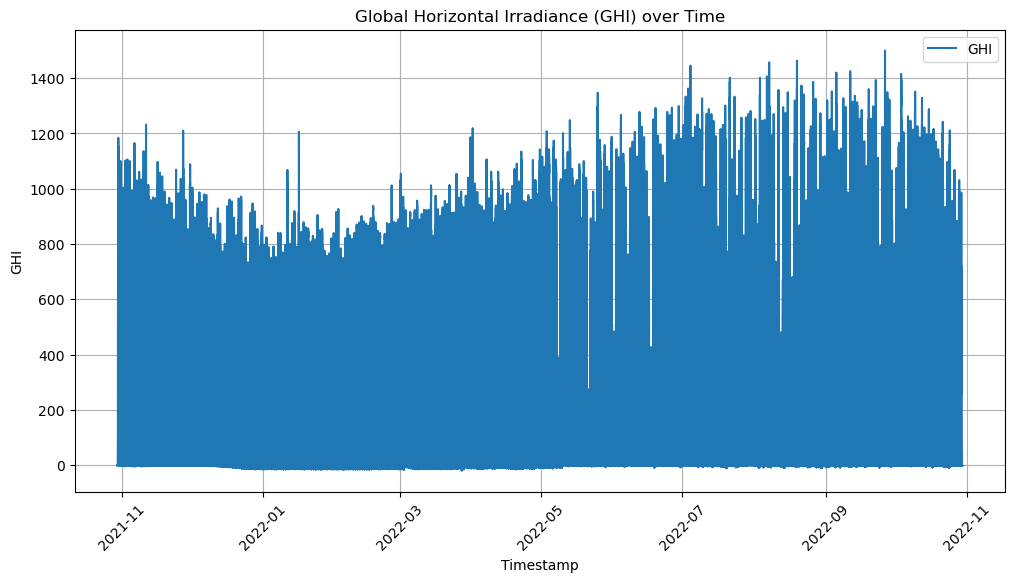

In [41]:


plt.figure(figsize=(12, 6))
plt.plot(SB['Timestamp'], SB['GHI'], label='GHI')
plt.title('Global Horizontal Irradiance (GHI) over Time')
plt.xlabel('Timestamp')
plt.ylabel('GHI')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
##Scatter-Plot:Showing the relationship between Global Horizontal Irradiance (GHI) and Direct Normal Irradiance (DNI)

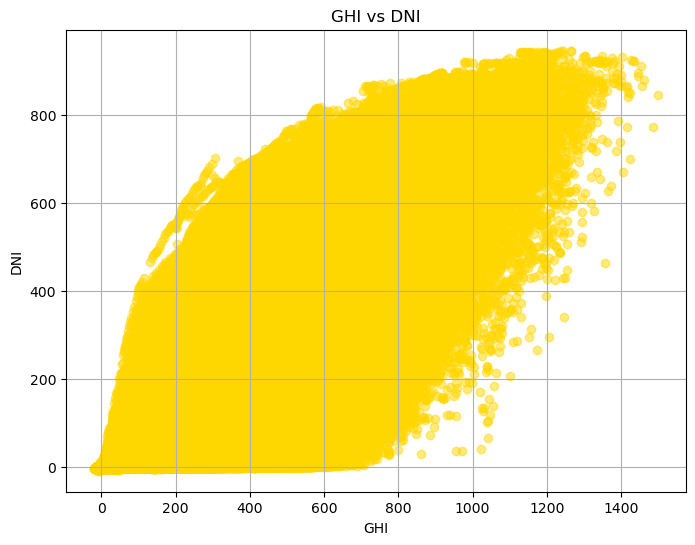

In [37]:

plt.figure(figsize=(8, 6))
plt.scatter(SB['GHI'], SB['DNI'], alpha=0.5, color='GOLD')
plt.title('GHI vs DNI')
plt.xlabel('GHI')
plt.ylabel('DNI')
plt.grid(True)
plt.show()

## Box Plot:Comparing the distribution of Global Horizontal Irradiance (GHI) for different Wind Speed categories.

In [ ]:


plt.figure(figsize=(10, 6))
sns.boxplot(x=benin_data['WS'], y=benin_data['GHI'])
plt.title('Box Plot of GHI for Different Wind Speeds')
plt.xlabel('Wind Speed')
plt.ylabel('GHI')
plt.grid(axis='y')
plt.show()
